# **Hypothesis Testing with Insurance Data**
*   Samar KRIMI
*   16/11/2023

---

We will be working with the US Health Insurance Dataset from Kaggle : https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv

Using the hypothesis testing to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [ ]:
## Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

In [ ]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Load in Data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
# Display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [ ]:
# Check missing values : No NaN
df.isna().sum().sum()

0

In [ ]:
# Check for exact duplicates (rows)
df.duplicated().sum()

1

In [ ]:
# Check to see which data is duplicated
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# Drop duplicates using the drop() method
df.drop_duplicates(inplace = True)

In [ ]:
# Check for remaining duplicated
df.duplicated().any()

False

In [ ]:
# Display info after dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Choosing the Right Hypothesis Test

## Q1. Do smokers have higher insurance charges than non-smokers?

### **STEP 1 : State The Hypothesis**

H0 (Null Hypothesis): There is no difference in charges between smokers and non-smokers.

HA (Alternative Hypothesis): There is a difference in charges between smokers and non-smokers.

### **STEP 2 : Determine the category/type of test based on the data**

> Numerical feature
  - 2 groups/samples
    - We want to run a 2-sample T-test

Visualize and Separate Groups
* Visualize the histogram of charges, but separate it into 2 groups based on the 'smoker' variable ==> 'charges' variable is our target & 'smoker' variable our groups.
* when comparing 2 groups with seaborn's histplot, you will want to add common_norm=False

In [ ]:
# Create a column that easly separates our groups
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
## Separate the 2 groups into 2 variables : grp_yes
grp_yes = df.loc[ df['smoker']=='yes','charges']
grp_yes

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [ ]:
# Length of grp_yes
len(grp_yes)

274

In [ ]:
## Separate the 2 groups into 2 variables : grp_no
grp_no = df.loc[ df['smoker']!='yes','charges']
grp_no

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64

In [ ]:
# Length (n) of grp_no before removing outliers
len(grp_no)

1063

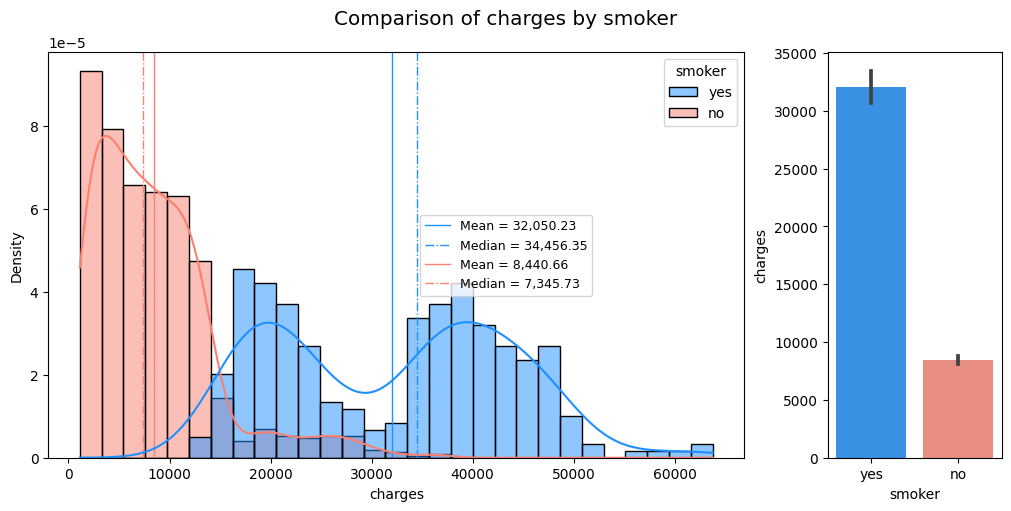

In [ ]:
## Exploring distributions of insurance charge by smoker
# mean
mean1 = np.mean(grp_yes)
mean2=np.mean(grp_no)
# median
median1 = np.median(grp_yes)
median2=np.median(grp_no)

fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})

smoker_palette={'yes':'dodgerblue', "no":'salmon'}
# Histogram of the insurance charges for smokers vs non-smokers
ax.axvline(mean1, ls='-', linewidth = 1, label=f'Mean = {mean1:,.2f}', color=smoker_palette['yes'])
ax.axvline(median1, ls='-.', linewidth = 1, label = f'Median = {median1:,.2f}', color=smoker_palette['yes'])

ax.axvline(mean2, ls='-', linewidth = 1, label=f'Mean = {mean2:,.2f}', color=smoker_palette['no'])
ax.axvline(median2, ls='-.', linewidth = 1, label = f'Median = {median2:,.2f}', color=smoker_palette['no'])

sns.histplot(data=df, x='charges', hue='smoker', common_norm=False, ax=ax,
             stat='density', kde=True, palette=smoker_palette);
fig.legend(prop={'size': 9}, loc='center');
# Barplot of the insurance charges for smokers vs non-smokers : visualize the group means
sns.barplot(data=df, x='smoker', y='charges', ax = ax_bar, palette=smoker_palette);
fig.suptitle('Comparison of charges by smoker', fontsize='x-large');

* Smokers have higher insurance charges than non-smokers thus "reject" the null hypothesis ==> accept the Ha (Alternative Hypothesis)
* Graphically Normal distribution is not assumed for both 2 cases because :
  - The mean & the median are diferent from each other, there's a positive skew for grp_no (the median is smaller than the mean).
  - The insurance charge smoker' (bleu) distribution has long tails on each side.

### **STEP 3 : Does the data meet the assumptions of the selected test**

Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (**AKA independent T-test**).

* The Assumptions are :
  - No significant outliers
  - Normality : Normally distributed groups
  - Equal Variance between groups

**1. Assumption: No Significant Outliers**

In [ ]:
## Check grp_yes for outliers using z-score > 3 rule
idx_outliers_yes = np.abs(stats.zscore(grp_yes)) > 3
idx_outliers_yes

0       False
11      False
14      False
19      False
23      False
        ...  
1313    False
1314    False
1321    False
1323    False
1337    False
Name: charges, Length: 274, dtype: bool

In [ ]:
# idx_outliers_yes
idx_outliers_yes.sum()

0

In [ ]:
## Check grp_no for outliers using z-score > 3 rule
idx_outliers_no = np.abs(stats.zscore(grp_no)) > 3
idx_outliers_no

1       False
2       False
3       False
4       False
5       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Name: charges, Length: 1063, dtype: bool

In [ ]:
# idx_outliers_no
idx_outliers_no.sum()

24

In [ ]:
## Remove outliers from grp_no
grp_no = grp_no.loc[~idx_outliers_no]
grp_no
#grp_no = grp_no[idx_outliers_no==False]
#grp_no

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1039, dtype: float64

In [ ]:
## Length (n) after removing outliers
len(grp_no)

1039

> Some outliers ! Assumption not met

**2. Assumption: Normally Distributed Groups**

D'Agostino-Pearson's normality test :  scipy.stats.normaltest

Outcome used :
- If the data are not normally distributed
  - If the group sizes (n) are large enough, we can safely ignore the normality assumption

In [ ]:
## Use normaltest to check if grp_yes is normally distributed
stats.normaltest(grp_yes)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [ ]:
## Check n for grp_yes
len(grp_yes)

274

In [ ]:
## Use normaltest to check if grp_no is normally distributed
stats.normaltest(grp_no)

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

In [ ]:
## Check n for grp_no
len(grp_no)

1039

> In both groups p-value < 0.05 this is interpreted as a significant deviation from the normal distribution and it can be assumed that the data are not normally distributed.
Normal distribution is not assumed, Assumption not met.

(n) grp_yes=274>15 & (n) grp_no=1039>15
=> We have large enough groups that we can safely disregard the assumption of normality.

**3. Assumption: Equal Variance**

Levene's Test: scipy.stats.levene

In [ ]:
## Use Levene's test to check if groups have equal variance
stats.levene(grp_yes, grp_no)

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

> p-value < 0.05 Equal Variance is not assumed. Assumption not met.

=> Fail the assumption of Equal Variance : run either a Welch's t-test and add equal_var = False

* Some outliers ! Assumption not met.
*  We have large enough groups that we can safely disregard the assumption of normality.
* Equal Variance is not assumed. Assumption not met.
> The assumptions for the T-Test are not met, we can not perform Final Hypothesis Test (T-Test). We will need to use a **Welch's T-Test** test instead.

### **STEP 4 : Perform Test & Interpret Result**

### Final Hypothesis Test - Welch's T-Test

In [ ]:
# Welch's t-test and add equal_var = False
result = stats.ttest_ind(grp_yes, grp_no, equal_var = False)
result

TtestResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104, df=301.2742404943753)

In [ ]:
# Calcualte group means to know which group had more/less insurance charges
grp_yes.mean(), grp_no.mean()

(32050.23183153284, 7945.9246538585185)

We had a p-value < .05 for our welch's t-test : Reject the null hypothesis and support the alternative that ***there is a difference in charges between smokers and non-smokers.***

# Q1 : OPTIONAL
Visualize cleaned groups

In [ ]:
## Combine all of the indices from grp_no and grp_yes into 1 list
combined_ids = [*grp_no.index,*grp_yes.index]
combined_ids[:5]

[1, 2, 3, 4, 5]

In [ ]:
## Create a clean version of df by only keeping
df = df[df.index.isin(combined_ids)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


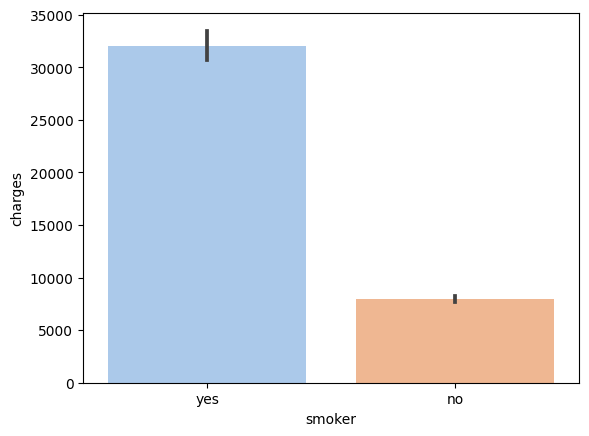

In [ ]:
# Barplot of the insurance charges for smokers vs non-smokers for cleaned groups
sns.barplot(data=df, x='smoker', y='charges', palette='pastel');

## Q2. Are men more likely to smoke than women?

### **STEP 1 : State The Hypothesis**

H0 (Null Hypothesis): There is no significant difference of smoking between men and women.

HA (Alternative Hypothesis): There is a significant difference of smoking between men and women.

### **STEP 2 : Determine the category/type of test based on the data**
> 2 Categorical variables (nominal)
  - The outcomes are independent
    - We want to run a Chi-Square test : we want to test if there is a difference between the number of men and women who smokes/not smokes.

Visualize and Separate Groups
* Visualize the countplot of smokers, but separate it into 2 groups based on the 'sex' variable

==> 'smoker' variable is our target & 'sex' variable our groups.

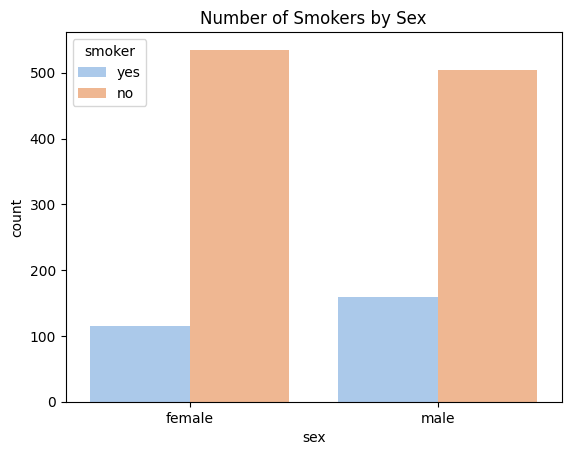

In [ ]:
# Let's visualize smokers by sex
ax = sns.countplot(data=df, x='sex', hue='smoker', palette='pastel')
ax.set_title("Number of Smokers by Sex");

### **STEP 3 : Does the data meet the assumptions of the selected test**

Getting the Contingency : The input of the test is a contingency table that shows the frequency of each outcome for each group.

In order to run the Chi-Squared Test, we need a contingency table.

- In other words, we need to know how many observations from each group variable (sex) fell into which category in the target (smoker).

  - We can use pd.crosstab to calculate this table.


In [ ]:
# Calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,535,115
male,504,159


### **STEP 4 : Perform Test & Interpret Result**

### Final Hypothesis Test - Chi-Square Test

In [ ]:
# Run the Chi-Square test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result # this labels the results

In [ ]:
# The output of the Chi-Square test
result

Chi2ContingencyResult(statistic=7.486413718216949, pvalue=0.006216624258113029, dof=1, expected_freq=array([[514.35643564, 135.64356436],
       [524.64356436, 138.35643564]]))

In [ ]:
# The test statistic (float)
chi2

7.486413718216949

In [ ]:
# The degrees of freedom.
deg_free

1

In [ ]:
# The expected frequencies, based on the marginal sums of the table
expected_vals

array([[514.35643564, 135.64356436],
       [524.64356436, 138.35643564]])

In [ ]:
# What was our p-value
print(p)
p<.05

0.006216624258113029


True

Since our p < .05, we reject the null hypothesis.
This means that we accept the alternate hypothesis and conclude that ***there is a significant difference of smoking between men and women.***

## Q3. Do different regions have different charges, on average?

### **STEP 1 : State The Hypothesis**

H0 (Null Hypothesis): On average there's no difference in charges between different regions.

HA (Alternative Hypothesis): On average there's a difference in charges between different regions.

- Note that our hypothesis does NOT specify which groups are different, just that there is or isn't a difference when taking all four into consideration.

### **STEP 2 : Determine the category/type of test based on the data**

> Numerical feature
  - 4 groups/samples
    - We want to run an One-Way Anova Test

Visualize and Separate Groups
* Visualize the 4 group means
==> 'charges' variable is our target & 'region' variable our groups.


In [ ]:
# Create a column that easly separates our groups
df['region'].value_counts()

southeast    357
southwest    322
northeast    319
northwest    315
Name: region, dtype: int64

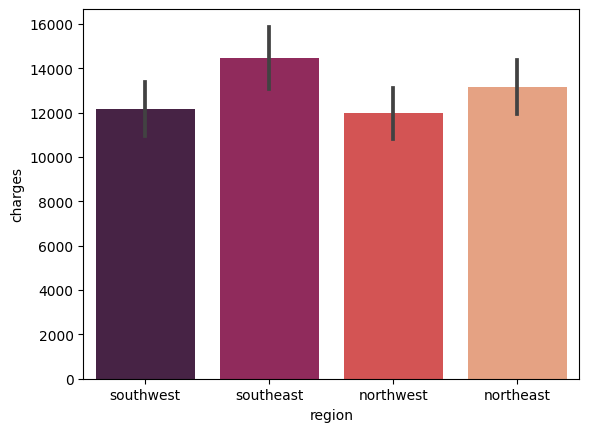

In [ ]:
## Plot a barplot of the insurance charges for the 4 regions
sns.barplot(data=df, x='region', y='charges', palette='rocket');

* On average there's a difference in charges between different regions thus "reject" the null hypothesis ==> accept the Ha (Alternative Hypothesis)

### **STEP 3 : Does the data meet the assumptions of the selected test**

Since we are comparing a numeric measurement between 4 groups, we want to run an One-Way Anova Test

* The Assumptions are :
  - No significant outliers
  - Normality : Normally distributed groups
  - Equal Variance between groups

### Separating Our Groups

In [ ]:
# Check our feature & our groups
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [ ]:
## Create a dictionary with each group as key and charges as values
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()

    # Save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

  - The groups are independent : the 4 groups 'southwest', 'southeast', 'northwest', 'northeast'are independant.

  - Each group is from a normally distributed population.

  - The population standard deviations of the groups are all equal. This property is known as homoscedasticity or homogeneity.
  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


In [ ]:
# Check each group is from a normally distributed population
result = stats.normaltest(data)
print(result)
result.pvalue < .05

NormaltestResult(statistic=94.1180014468049, pvalue=3.652041146365498e-21)


True

In [ ]:
# Check the population standard deviations of all the groups : almost equal
(df['region']=='southwest').std(), (df['region']=='southeast').std(), (df['region']=='northwest').std(), (df['region']=='northeast').std()

(0.4303932807201061,
 0.44510633313813536,
 0.4271901860476775,
 0.429031572503578)

**1. Assumption of No Sig. Outliers**

In [ ]:
## Loop through groups dict
for region, data in groups.items():

    ## Determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3

    ## Print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    ## Remove the outiers from data and overwrite the region data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


> Some outliers ! Assumption not met.

**2. Assumption: Normally Distributed Groups**

In [ ]:
## Running normal test on each group and confirming there are >= 15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## Convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,314.0,3.787710e-23,103.255391
southeast,355.0,2.061288e-14,63.025721
northwest,308.0,6.472201e-23,102.183882
northeast,315.0,6.997154e-19,83.607227


In [ ]:
## Checking sig with pandas
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
southwest,314.0,3.787710e-23,103.255391,True
southeast,355.0,2.061288e-14,63.025721,True
northwest,308.0,6.472201e-23,102.183882,True
northeast,315.0,6.997154e-19,83.607227,True


> p-value < 0.05 this is interpreted as a significant deviation from the normal distribution and it can be assumed that the data are not normally distributed.
Normal distribution is not assumed, Assumption not met.
==> The group sizes (n) are large enough, we can safely ignore the normality assumption.

**3. Assumption: Equal Variance**

In [ ]:
## Use Levene's test to check if groups have equal variance
# with the * operator
stats.levene(*groups.values())

LeveneResult(statistic=9.967328985389276, pvalue=1.6981938592170365e-06)

In [ ]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


> p-value < 0.05 Equal Variance is not assumed. Assumption not met.

  * We met the assumption of normality but did NOT met the assumption of equal variance neither the no significant outliers.
  * We wanted to run an ANOVA test but will need to use a **Kurskal-Wallis test** instead.


### **STEP 4 : Perform Test & Interpret Result**

### Final Hypothesis Test - Kurskal-Wallis Test

In [ ]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.888479236968578, pvalue=0.07553855356726757)


False

Our Kruskal Wallis test returned a p-value >.05.
We fail to reject the null hypothesis and conclude that ***On average there's no significant difference in charges between different regions***.

## Q3 : OPTIONAL

In [ ]:
## Concatenate groups
plot_df = pd.concat(groups)
plot_df

southwest  0       16884.92400
           12       1826.84300
           15       1837.23700
           18      10602.38500
           19      36837.46700
                      ...     
northeast  1321    28101.33305
           1325    13143.33665
           1326     7050.02130
           1328    22395.74424
           1334     2205.98080
Name: charges, Length: 1292, dtype: float64

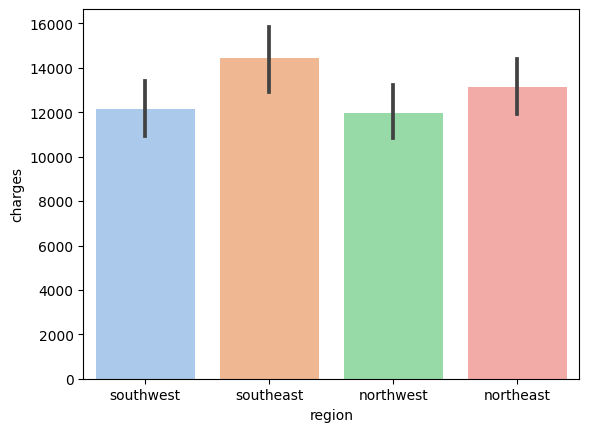

In [ ]:
## Plot a barplot of the insurance charges for the 4 regions
sns.barplot(data=df, x='region', y='charges', palette='pastel');